In [64]:
import numpy as np
import matplotlib.pyplot as plt

from vmls import QR_factorization, back_subst, vandermonde

# 11.1 Left and right inverses

## Left inverse

A matrix $X$ that satisfies
$$
XA = I
$$
is called a *left inverse* of $A$. The matrix $A$ is said to be *left-invertible$ if a left inverse exists.

In [2]:
A = np.array([[-3, -4],
              [4, 6],
              [1, 1]])

B = np.array([[-11, -10, 16],
              [7, 8, -11]]) / 9  # left inverse of A

C = np.array([[0, -1, 6],
              [0, 1, -4]]) / 2  # Another left inverse of A

# Let's check
B @ A

array([[ 1.0000000e+00,  0.0000000e+00],
       [-4.4408921e-16,  1.0000000e+00]])

In [3]:
C @ A

array([[1., 0.],
       [0., 1.]])

## Left-invertibility and column independence

If $A$ has a left inverse $C$ then the columns of $A$ are linearly independent.
To see this, suppose that $Ax = 0$. Multiplying on the left by a left inverse $C$, we get
$$
0 = C(Ax) = (CA)x = Ix = x,
$$
which shows that the only linear combination of the columns of A that is 0 is the one with all coefficients zero.

In [4]:
A = np.array([[-3, -4],
              [4, 6],
              [1, 1]])
A[:, 0] @ A[:, 1]

37

Use **Cauchy–Schwarz inequality** to check linear dependence.
$$|\langle \mathbf {u} ,\mathbf {v} \rangle |\leq \|\mathbf {u} \|\|\mathbf {v} \|.$$

If the inner product of the vectors is equal to the product of the norm of the vectors, the vectors are linearly dependent.

https://en.wikipedia.org/wiki/Cauchy%E2%80%93Schwarz_inequality

https://stackoverflow.com/questions/28816627/how-to-find-linearly-independent-rows-from-a-matrix

In [5]:
np.inner(A[:, 0], A[:, 1]) - np.linalg.norm(A[:, 0]) * np.linalg.norm(A[:, 1]) <= 1e-5

True

## Dimensions of left inverses

Suppose the m × n matrix $A$ is wide, i.e., m < n.
By the independence-dimension inequality, its columns are linearly dependent, and
therefore it is not left-invertible. Only **square** or **tall** matrices can be left-invertible.

## Solving linear equations with a left inverse

$$Cb = C(Ax) = (CA)x = Ix = x$$
A left inverse can be used to determine whether or not a solution of an over-determined set of linear equations exists, and when it does, find the unique solution.

In [6]:
# Ax = b
x = np.array([[2],
                   [1]])

A = np.array([[-3, -4],
              [4, 6],
              [1, 1]])
b = A @ x
b

array([[-10],
       [ 14],
       [  3]])

In [7]:
# x = A^-1 b
B = np.array([[-11, -10, 16],
              [7, 8, -11]]) / 9  # left inverse of A
B @ b

array([[2.],
       [1.]])

In [8]:
# x = A^-1 b
C = np.array([[0, -1, 6],
              [0, 1, -4]]) / 2  # Another left inverse of A
C @ b

array([[2.],
       [1.]])

## Right inverse

A matrix $X$ that satisfies 
$$AX = I$$
is called a *right inverse* of $A$. The matrix $A$ is *right-invertible* if a right inverse exists. Any right inverse has the same dimensions as $A^T$.

## Left and right inverse of matrix transpose

If $A$ has a *right inverse* $B$, then $B^T$ is a *left inverse* of $A^T$, since $B^T A^T = (AB)^T = I$.

If $A$ has a *left inverse* $C$, then $C^T$ is a *right inverse* of $A^T$, since $A^T C^T = (CA)^T = I$.


- A matrix is right-invertible if and only if its rows are linearly independent.
- A tall matrix cannot have a right inverse. Only square or wide matrices can be right-invertible.

In [9]:
A = np.array([[-3, -4],
              [4, 6],
              [1, 1]])

C = np.array([[0, -1, 6],
              [0, 1, -4]]) / 2  # Another left inverse of A

# the columns of A are linearly independent
C @ A

array([[1., 0.],
       [0., 1.]])

In [10]:
# the columns of A are linearly independent, i.e. the rows of A^T are linearly independent
A.T @ C.T

array([[1., 0.],
       [0., 1.]])

## Solving linear equations with a right inverse

$$ x=Bb $$
$$ Ax = A(Bb) = (AB)b = Ib = b $$

A right inverse can be used to find a solution of a square or underdetermined set of linear equations, for any vector $b$.

In [11]:
A = np.array([[-3, -4],
              [4, 6],
              [1, 1]])

B = np.array([[-11, -10, 16],
              [7, 8, -11]]) / 9  # left inverse of A

C = np.array([[0, -1, 6],
              [0, 1, -4]]) / 2  # Another left inverse of A

b = np.array([[1],
              [2]])

In [12]:
print(A.T @ (B.T @ b))
print(B.T @ b)  # x

[[1.]
 [2.]]
[[ 0.33333333]
 [ 0.66666667]
 [-0.66666667]]


In [13]:
print(A.T @ (C.T @ b))
print(C.T @ b)  # x

[[1.]
 [2.]]
[[ 0. ]
 [ 0.5]
 [-1. ]]


# 11.2 Inverse

If a matrix is left- and right-invertible, then the left and right inverses are **unique** and **equal**. To see this, suppose that $AX = I$ and $YA = I$, i.e., $X$ is any right inverse and $Y$ is any left inverse of $A$. Then we have

$$
X = (YA)X = Y(AX) = Y
$$

When a matrix $A$ has both a left inverse $Y$ and a right inverse $X$, we call the matrix $X = Y$ simply the ***inverse*** of $A$, and denote it as $A^{−1}$. We say that $A$ is ***invertible*** or ***nonsingular***. A square matrix that is not invertible is called ***singular***.

Invertible matrices must be **square**, since tall matrices are not right-invertible, while wide matrices are not left-invertible.

## Solving linear equations with the inverse

The square system of linear equations $Ax = b$, with $A$ *invertible*, has the unique solution $x = A^{−1} b$, for any n-vector $b$.

- $A^{-1}$ is the left inverse of $A$ => unique
- $A^{-1}$ is the right inverse of $A$ => any n-vector $b$

## Invertibility conditions

For a square matrix A, the following are equivalent.
- A is invertible.
- The columns of A are linearly independent.
- The rows of A are linearly independent.
- A has a left inverse.
- A has a right inverse.

In [14]:
A = np.array([[1, -2, 3],
              [0, 2, 2],
              [-4, -4, -4]])
B = np.linalg.inv(A)
B

array([[-2.77555756e-17, -5.00000000e-01, -2.50000000e-01],
       [-2.00000000e-01,  2.00000000e-01, -5.00000000e-02],
       [ 2.00000000e-01,  3.00000000e-01,  5.00000000e-02]])

In [15]:
A @ B

array([[ 1.00000000e+00,  0.00000000e+00, -1.38777878e-17],
       [ 5.55111512e-17,  1.00000000e+00,  1.38777878e-17],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [16]:
B @ A

array([[ 1.00000000e+00, -2.22044605e-16, -2.22044605e-16],
       [ 0.00000000e+00,  1.00000000e+00,  8.32667268e-17],
       [ 0.00000000e+00,  5.55111512e-17,  1.00000000e+00]])

## Inverse of matrix transpose

If $A$ is invertible, its transpose $A^T$ is also invertible and its inverse is $(A^{−1})^T$:
$$
(A^T)^{−1} = (A^{−1})^T
$$

In [17]:
A = np.array([[1, -2, 3],
              [0, 2, 2],
              [-4, -4, -4]])
np.linalg.inv(A.T)

array([[ 0.  , -0.2 ,  0.2 ],
       [-0.5 ,  0.2 ,  0.3 ],
       [-0.25, -0.05,  0.05]])

In [18]:
np.linalg.inv(A).T

array([[-2.77555756e-17, -2.00000000e-01,  2.00000000e-01],
       [-5.00000000e-01,  2.00000000e-01,  3.00000000e-01],
       [-2.50000000e-01, -5.00000000e-02,  5.00000000e-02]])

## Inverse of matrix product

If $A$ and $B$ are invertible (hence, square) and of the same size, then $AB$ is invertible, and
$$
(AB)^{−1} = B^{−1}A^{−1}
$$

In [19]:
A = np.array([[1, -2, 3],
              [0, 2, 2],
              [-4, -4, -4]])
B = np.array([[1, -2, 3],
              [0, 2, 2],
              [-3, -4, -4]])
np.linalg.inv(A @ B)

array([[ 0.06666667, -0.23333333,  0.01666667],
       [-0.04666667,  0.11333333,  0.03833333],
       [-0.05333333, -0.01333333, -0.06333333]])

In [20]:
np.linalg.inv(B) @ np.linalg.inv(A)

array([[ 0.06666667, -0.23333333,  0.01666667],
       [-0.04666667,  0.11333333,  0.03833333],
       [-0.05333333, -0.01333333, -0.06333333]])

## Dual basis

Suppose that $A$ is invertible with inverse $B = A^{−1}$. Let $a_1, \ldots, a_n$ be the columns of $A$, and $b^T_1, \ldots, b^T_n$ denote the rows of $B$, i.e., the columns of $B^T$:

$$
A = \begin{bmatrix} a_1 & \cdots & a_n \end{bmatrix}, \quad
B = \begin{bmatrix} b^T_1 \\ \vdots \\ b^T_n \end{bmatrix}
$$

We know that $a_1, \ldots, a_n$ form a basis, since the columns of $A$ are linearly independent. The vectors $b_1, \ldots, b_n$ also form a basis, since the rows of $B$ are linearly independent. They are called the *dual basis* of $a_1, \ldots, a_n$. (The dual basis of $b_1, \ldots, b_n$ is $a_1, \ldots, a_n$, so they called *dual bases*.)

Suppose $x$ is any n-vector. It can be expressed as a linear combination of the basis vectors $a_1, \ldots, a_n$:
$$
x = \beta_1 a_1 + \cdots + \beta_n a_n
$$
The dual basis gives us a simple way to find the coefficients $\beta_1, \ldots, \beta_n$.
$$
x 
= Ix 
= ABx 
= \begin{bmatrix} a_1 & \cdots & a_n \end{bmatrix} \begin{bmatrix} b^T_1 \\ \vdots \\ b^T_n \end{bmatrix} x
= (b^T_1 x)a_1 + \cdots + (b^T_n x)a_n.
$$

In [21]:
A = np.array([[1, 0, 1],
              [4, -3, -4],
              [1, -1, -2]])
B = np.linalg.inv(A)
x = np.array([0.2, -0.3, 1.2])
RHS = (B[0,:]@x) * A[:,0] + (B[1,:]@x) * A[:,1] + (B[2,:]@x) * A[:,2]
print(RHS)

[ 0.2 -0.3  1.2]


## Triangular matrix

A triangular matrix with nonzero diagonal elements is invertible.

Lx=0 is only possible if x = 0 => columns of L are linearly independent => L is invertible

In [22]:
L = np.tril(np.arange(1, 10).reshape(3, 3))
L

array([[1, 0, 0],
       [4, 5, 0],
       [7, 8, 9]])

In [23]:
np.linalg.inv(L)

array([[ 1.00000000e+00,  0.00000000e+00, -6.16790569e-18],
       [-8.00000000e-01,  2.00000000e-01,  1.23358114e-17],
       [-6.66666667e-02, -1.77777778e-01,  1.11111111e-01]])

In [24]:
U = L.T
U

array([[1, 4, 7],
       [0, 5, 8],
       [0, 0, 9]])

In [25]:
np.linalg.inv(U)

array([[ 1.        , -0.8       , -0.06666667],
       [ 0.        ,  0.2       , -0.17777778],
       [ 0.        ,  0.        ,  0.11111111]])

## Inverse via QR factorization

If $A$ is square and invertible, its columns are linearly independent, so it has a QR factorization 
- $A = QR$
- $Q$ is orthogonal: $Q^TQ = I$
- $R$ is upper triangular, hence invertible

so we have
$$
A^{-1} = (QR)^{-1} = R^{-1} Q^{-1} = R^{-1} Q^T
$$

In [26]:
A = np.random.normal(size = (3,3))
np.linalg.inv(A)

array([[-0.88707392, -0.38134953,  0.3528666 ],
       [ 0.8253171 , -0.29117151,  0.23183498],
       [ 0.1133084 , -0.14565458, -0.81071854]])

In [27]:
Q, R = np.linalg.qr(A)
print(Q)
print(R)
np.linalg.inv(R) @ Q.T

[[-0.35930487  0.92321642 -0.13627713]
 [-0.92596488 -0.33451597  0.1751802 ]
 [ 0.11614236  0.18913094  0.9750592 ]]
[[ 1.40286098  0.97022806  0.74478773]
 [ 0.          1.10718064  0.08332394]
 [ 0.          0.         -1.20270988]]


array([[-0.88707392, -0.38134953,  0.3528666 ],
       [ 0.8253171 , -0.29117151,  0.23183498],
       [ 0.1133084 , -0.14565458, -0.81071854]])

# 11.3 Solving linear equations

## Back substitution

**given** an n × n upper triangular matrix $R$ with nonzero diagonal entries, and an n-vector $b$.

For $i = n, \ldots, 1$,

$\quad x_i = (b_i − R_{i,i+1}x_{i+1} − \cdots − R_{i,n}x_n)/R_{ii}.$

called back substitution since we find the variables in reverse order, substituting the already known values of $x_i$

In [28]:
def back_subst_1(R, b_tilde):
    n = R.shape[0]
    x = np.zeros(n)
    for i in reversed(range(n)):
        x[i] = b_tilde[i]
        for j in range(i+1, n):
            x[i] = x[i] - R[i, j]*x[j]
        x[i] = x[i]/R[i,i]
    return x


def back_subst_2(R, b):
    n = len(b)
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (b[i] - R[i, i+1:n] @ x[i+1:n]) / R[i, i]
    return x

In [29]:
R = np.triu(np.random.random((4, 4)))
b = np.random.random(4)
print(R)
print(b)

[[0.72480409 0.15314082 0.20523787 0.63373786]
 [0.         0.87833091 0.42742803 0.20293302]
 [0.         0.         0.06058676 0.27862613]
 [0.         0.         0.         0.32989371]]
[0.40115577 0.67318416 0.34779505 0.25390318]


In [30]:
x_1 = back_subst_1(R, b)
x_2 = back_subst_2(R, b)

print(np.linalg.norm(R @ x_1 - b))
print(np.linalg.norm(R @ x_2 - b))

0.0
0.0


In [31]:
x_1

array([-0.64078062, -0.48246361,  2.20097679,  0.76965146])

In [32]:
x_2

array([-0.64078062, -0.48246361,  2.20097679,  0.76965146])

In [33]:
b[3] / R[3, 3]

0.7696514593781237

In [34]:
(b[2] - R[2, 3:4] @ (np.array([b[3] / R[3, 3]]))) / R[2, 2]

2.200976790408111

## Complexity of back substitution

- first step requires 1 flop (division)
- 2nd step needs 3 flops (one multiply, one subtraction, and one division)
- kth step requires k − 1 multiplies, k − 1 subtractions, and one division

The total number of flops for back substitution is then
$$
1 + 3 + 5 + \cdots + (2n − 1) = n^2
$$

## Solving linear equations using the QR factorization

$$x = A^{-1}b = (QR)^{-1}b = R^{-1}Q^Tb$$
**given** an n × n invertible matrix $A$ and an n-vector $b$.
1. QR factorization. Compute the QR factorization $A = QR$.
2. Compute $Q^Tb$.
3. Back substitution. Solve the triangular equation $Rx = Q^Tb$ using back substitution

complexity $2n^3$ (step 1), $2n^2$ (step 2), $n^2$ (step 3)

total is $2n^3 + 3n^2 ≈ 2n^3$

In [35]:
def solve_via_backsub(A, b):
    Q,R = QR_factorization(A)
    b_tilde = Q.T @ b
    x = back_subst(R,b_tilde)
    return x

In [37]:
A = np.random.normal(size=(3, 3))
b = np.random.normal(size=3)

In [38]:
np.linalg.solve(A, b)

array([-0.41962669, -0.22684386,  0.03578258])

In [39]:
solve_via_backsub(A, b)

Vectors are linearly independent.


array([-0.41962669, -0.22684386,  0.03578258])

### Compare the running time of different methods

In [41]:
n = 5000
A = np.random.randn(n, n)
b = np.random.randn(n)

In [42]:
x1 = np.linalg.solve(A, b)
x2 = np.matmul(np.linalg.inv(A), b)
x3 = np.linalg.inv(A) @ b

print(np.linalg.norm(b - A @ x1))
print(np.linalg.norm(b - A @ x2))
print(np.linalg.norm(b - A @ x3))

3.596351831485748e-10
5.387277891729717e-10
5.387277891729717e-10


In [43]:
%timeit x1 = np.linalg.solve(A, b)
%timeit x2 = np.matmul(np.linalg.inv(A), b)
%timeit x3 = np.linalg.inv(A) @ b

886 ms ± 13.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.41 s ± 205 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.26 s ± 91.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [46]:
n = 10000
A = np.random.randn(n, n)
b = np.random.randn(n)

In [47]:
%timeit x1 = np.linalg.solve(A, b)  # 0.886s -> 6.38s => n^3 complexity

6.38 s ± 493 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Julia chooses a suitable algorithm for solving the equation after checking the properties of A, but numpy wwill not do this.

In [48]:
A = np.tril(np.random.randn(n, n))

In [49]:
%timeit x1 = np.linalg.solve(A, b)  # 0.886s -> 6.24s => n^3 complexity

6.24 s ± 309 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Factor-solve methods for multiple right-hand sides

In [52]:
n = 5000
A = np.random.randn(n, n)
B = np.random.randn(n, 2)

In [54]:
# Solve with right-hand side B[:, 0]
%timeit np.linalg.solve(A, B[:, 0])

# Solve with right-hand side B[:, 1]
%timeit np.linalg.solve(A, B[:, 1])

# naive solving takes twice as long as an individual solve
%timeit [np.linalg.solve(A,B[:,0]), np.linalg.solve(A,B[:,1])]

# factor solve takes roughly same time as one RHS
%timeit np.linalg.solve(A,B)

884 ms ± 24.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
912 ms ± 34.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.87 s ± 25.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
926 ms ± 19.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# 11.4 Examples

## Polynomial interpolation

In [60]:
t = np.array([-1.1, -0.4, 0.2, 0.8])
A = np.fliplr(np.vander(t, 4))  # or use our function vandermonde(t, 4)
A

array([[ 1.   , -1.1  ,  1.21 , -1.331],
       [ 1.   , -0.4  ,  0.16 , -0.064],
       [ 1.   ,  0.2  ,  0.04 ,  0.008],
       [ 1.   ,  0.8  ,  0.64 ,  0.512]])

In [62]:
b1 = np.array([-1.0, 1.3, 1.0, 0.5])
c1 = np.linalg.solve(A, b1)
c1

array([ 1.21095688, -0.88831052, -1.10966519,  1.38647902])

In [63]:
b2 = np.array([1.0, 0.0, -2.0, 0.0])
c2 = np.linalg.solve(A, b2)
c2

array([-1.54128912, -3.10905469,  3.33847439,  3.69513527])

In [65]:
ts = np.linspace(-1.2, 1.2, 1000)
p1 = c1[0] + (c1[1]*ts) + (c1[2]*(ts**2))+ (c1[3]*(ts**3))
p2 = c2[0] + (c2[1]*ts) + (c2[2]*(ts**2))+ (c2[3]*(ts**3))

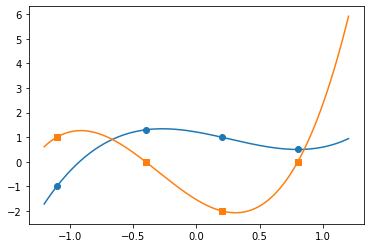

In [75]:
fig, ax = plt.subplots()
ax.plot(ts, p1)
ax.scatter(t, b1)
ax.plot(ts, p2)
ax.scatter(t, b2, marker='s')
plt.show()

# 11.5 Pseudo-inverse

## Linearly independent columns and Gram invertibility

m × n matrix $A$ has linearly independent columns if and only if its n × n Gram matrix $A^T A$ is invertible

$$Ax = 0 \Leftrightarrow A^TAx = 0$$
- $\Rightarrow$: if $Ax = 0$ then $(A^TA)x = A^T(Ax) = A^T 0 = 0$, i.e. $A^TA$ has linearly independent columns
- $\Leftarrow$: if $(A^TA)x = 0$ then
$$0 = x^T0 = x^T(A^T Ax) = x^T A^T Ax = \|Ax\|^2$$
so $Ax = 0$, i.e. $A$ has linearly independent columns

## Pseudo-inverse of square or tall matrix

If m × n matrix A has linearly independent columns (m >= n) then
- A has a left inverse
- $A^T A$ is invertible.

We now observe that the matrix $(A^T A)^{−1}A^T$ is a left inverse of A:
$$
(A^T A)^{−1}A^T A = (A^T A)^{−1}(A^T A) = I
$$


The pseudo-inverse of A
$$
A^{\dagger} = (A^T A)^{−1}A^T
$$

**Caution**:

The above description is a special case.

you can check https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse#Linearly_independent_columns

## Pseudo-inverse of a square or wide matrix

If m × n matrix A has linearly independent rows (m <= n) then
- A has a right inverse
- $AA^T$ is invertible

We now observe that the matrix $A^T(AA^T)^{−1}$ is a right inverse of A:
$$
A A^T(AA^T)^{−1}= (A A^T) (AA^T)^{−1} = I
$$


The pseudo-inverse of A
$$
A^{\dagger} = A^T(AA^T)^{−1}
$$

**Caution**:

The above description is a special case.

you can check https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse#Linearly_independent_rows

## Pseudo-inverse via QR factorization

If $A$ is left-invertible, its columns are linearly independent and the QR factorization $A = QR$ exists.

then $A^T A = (QR)^T(QR) = R^T Q^T QR = R^T R$

so 
$$
A^{\dagger} = (A^T A)^{−1}A^T = (R^T R)^{−1}(QR)^T = R^{-1} R^{-T} R^T Q^T = R^{-1} Q^T
$$

can compute $A^{\dagger}$ using back substitution on columns of $Q^T$

---
If $A$ is right-invertible, its rows are linearly independent and the QR factorization $A^T = QR$ exists.

then $A A^T= (QR)^T(QR) = R^T Q^T QR = R^T R$

so 
$$
A^{\dagger} =  A^T(A A^T)^{−1} = QR (R^T R)^{-1}  = QR R^{-1} R^{-T}= Q  R^{-T}
$$

an compute $A^{\dagger}$ using back substitution ($(A^T)^\dagger = (A^\dagger)^T$)

In [76]:
A = np.array([[-3, -4],
              [4, 6],
              [1, 1]])

np.linalg.pinv(A)

array([[-1.22222222, -1.11111111,  1.77777778],
       [ 0.77777778,  0.88888889, -1.22222222]])

In [78]:
Q, R = np.linalg.qr(A)
Q

array([[-0.58834841, -0.45760432],
       [ 0.78446454, -0.52297636],
       [ 0.19611614,  0.7190925 ]])

In [79]:
R

array([[ 5.09901951,  7.256297  ],
       [ 0.        , -0.58834841]])

In [80]:
np.linalg.solve(R, Q.T)

array([[-1.22222222, -1.11111111,  1.77777778],
       [ 0.77777778,  0.88888889, -1.22222222]])